# Exploratory Data Analysis and Feature Engineering

In [1]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
sns.set_theme(style='white')

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler, RobustScaler

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)})

In [2]:
data = pd.read_csv('./data/BankChurners.csv')
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                axis='columns')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data.describe().T.style.background_gradient(subset=['mean'],
                                            cmap='Pastel2').background_gradient(subset=['std'],
                                                                                cmap='Pastel1')

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


In [4]:
data["Attrition_Flag"] = data["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
categorical_data = list(data.select_dtypes('object'))
numerical_data = list(data.select_dtypes(['int64','float64']))

----------------

## Numerical Data  Analyze and Visualization

Numerical data refers to data that can be quantified and represented as a number. It can take on many forms, such as integers, floating-point numbers, and even counts. There are many ways to analyze numerical data, and the appropriate method depends on the specific characteristics of the data and the research question being investigated.

One of the most common ways to analyze numerical data is through descriptive statistics, which provide a summary of the main features of the data. For example, measures such as the mean, median, and mode can be used to describe the central tendency of a dataset, while measures such as the range, variance, and standard deviation can be used to describe the dispersion of the data.

Another common way to analyze numerical data is through inferential statistics, which allow to make inferences about a population based on a sample of data. For example, inferential statistics can be used to estimate population parameters, such as the mean and standard deviation, based on a sample of data, and to test hypotheses about population characteristics.

It's also common to visualize numerical data using plots such as histograms, box plots, and scatter plots. It's important to note that before analysis we should check for missing, outlier values and clean the data accordingly.

Additionally, in machine learning , numerical data is the most common input for algorithms, it is important to make sure that numerical data is properly transformed, standardized or normalized prior to model building.

In [6]:
data[numerical_data].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Attrition_Flag 

In [7]:
# inbalanced data
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [8]:
fig = px.histogram(data, x="Attrition_Flag",color_discrete_sequence=['#b7d3b3','#6c91b0'],color="Attrition_Flag",
                   title='Distribution of Churn Customer',labels={'Attrition_Flag':'customer state'})
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.show()

### Customer_Age

When dealing with continuous features such as age in a dataset, there are several common techniques that can be used to prepare the data for analysis. Here are a few examples:

Binning: This technique involves dividing the continuous feature into discrete "bins" or intervals, and then treating the feature as a categorical variable. Binning can be useful for reducing the amount of noise in the data, and for simplifying the analysis by reducing the number of unique values of the feature.

Scaling: This technique involves transforming the feature so that it has a mean of 0 and a standard deviation of 1. This can be useful for algorithms that are sensitive to the scale of the input features, such as linear regression and neural networks.

Normalization: This technique involves transforming the feature so that it has a minimum value of 0 and a maximum value of 1. Like scaling, normalization can be useful for algorithms that are sensitive to the scale of the input features.

Interaction features: In this technique, we create new features by combining two or more features. For example, we can create a new feature called "Age*Income" which is the product of Age and Income. This technique helps to understand how two features together impact the final outcome.

Log transformation: Log transformation is a technique in which we take the logarithm of the feature. This can be useful to handle the skewness in data when the data is distributed in a skewed manner.

In [9]:
data['Customer_Age'].sort_values(ascending=False).value_counts()
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())
print(data["Months_on_book"].describe())

26
73
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64


In [10]:
data.loc[(data['Customer_Age'] >= 25) & (data['Customer_Age'] < 35) ,'Customer_Age'] = 0
data.loc[(data['Customer_Age'] >= 35) & (data['Customer_Age'] < 45) ,'Customer_Age'] = 1
data.loc[(data['Customer_Age'] >= 45) & (data['Customer_Age'] < 55) ,'Customer_Age'] = 2
data.loc[(data['Customer_Age'] >= 55) & (data['Customer_Age'] < 65) ,'Customer_Age'] = 3
data.loc[(data['Customer_Age'] >= 65) ,'Customer_Age'] = 4
data['Customer_Age'] = data['Customer_Age'].astype(int)

In [11]:
data["Customer_Age"].value_counts()

2    4342
1    3440
3    1499
0     735
4     111
Name: Customer_Age, dtype: int64

In [12]:
fig = px.histogram(data, x="Customer_Age",color_discrete_sequence=['#65647C','#8B7E74','#DBA39A','#C7BCA1'],
                   color="Customer_Age", title='Distribution of Customer\'s Age',labels={'Customer_Age':'customer age'})
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer Age")
fig.show()

In [13]:
fig = px.histogram(data, x="Customer_Age",color_discrete_sequence=['#7895B2','#C2DED1','#C9BBCF','#AEBDCA'],
                   color="Attrition_Flag", title='Distribution of Customer\'s Age and Churn State',
                   labels={'Customer_Age':'customer age'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="State")
newnames = {'0':'not churn', '1': 'churn'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

In [14]:
fig = px.histogram(data, x="Customer_Age",color_discrete_sequence=['#F7DBF0','#BCCC9A','#CDBBA7',
                                                                   '#716F81','#A0937D','#A58FAA'],
                   color="Income_Category", title='Distribution of Customer\'s Age and Income',
                   labels={'Customer_Age':'customer age'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Income")
fig.show()

As can be seen from this chart, it is common for younger customers to earn less than $40K. A similar pattern is also seen in middle-aged customers. The highest income, 80K and above, is mostly seen in customers between the ages of 45-55.

### Dependent_count

*Dependent count* feature is a measure of the number of people that a credit card user is financially responsible for. A higher count of dependents would likely indicate that the cardholder's expenditures are higher, as they have more people to support financially.

The *dependent count* feature can be used to predict churn by analyzing the relationship between the number of dependents and the likelihood of a customer canceling their credit card. One way to do this would be to group customers by the number of dependents they have (e.g. 0, 1-2, 3-4, 5).

For feature engineering, we could consider creating a new binary feature that indicates whether a customer has dependents or not, as this can make it easier to analyze the relationship between dependents and churn. Additionally, we may also consider creating an interaction term between the dependent count and other features, such as income or age, to examine the impact of dependents on churn in different demographic groups.

In the case of using an interaction term between the dependent count and age or income, the idea is to examine whether the relationship between dependent count and churn is different for different age or income groups.

In [15]:
data['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [16]:
fig = px.histogram(data, x="Dependent_count",color_discrete_sequence=['#C9BBCF','#b7d3b3'],
                   color="Attrition_Flag", title='Distribution of Customer\'s Expenditures and Churn State',
                   labels={'Dependent_count':'customer expenditure'},
                  barmode='stack')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Expenditures")
newnames = {'0':'not churn', '1': 'churn'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

In [17]:
fig = px.histogram(data, x="Dependent_count",color_discrete_sequence=['#525E75','#92BA92','#FDEFEF','#F6AE99','#694E4E'],
                   color="Income_Category", title='Distribution of Customer\'s Income and Expenditure',
                   labels={'Dependent_count':'customer expenditure'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Income")
fig.show()

As we can see from this chart, the income of credit card users with average spending in general is less than $40K and around 40K. While the highest income category is higher for users with 3rd level spending value, it remains lower at other levels.

In [18]:
fig = px.histogram(data, x="Dependent_count",color_discrete_sequence=['#F6D7A7','#BCCC9A','#FFC898','#B5DEFF','#D57E7E'],
                   color="Customer_Age", title='Distribution of Customer\'s Age and Expenditure',
                   labels={'Dependent_count':'customer expenditure'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Age")
fig.show()

In a banking context, the **dependent_count** feature could be used to better understand a customer's financial responsibilities and their ability to manage their credit card expenses. For example, credit card companies may use this information to adjust credit limits, or to identify customers who may be at higher risk of defaulting on their payments.

### Months_on_book

This feature respresents the *period of relationship with bank*.

In [19]:
data["Months_on_book"].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14], dtype=int64)

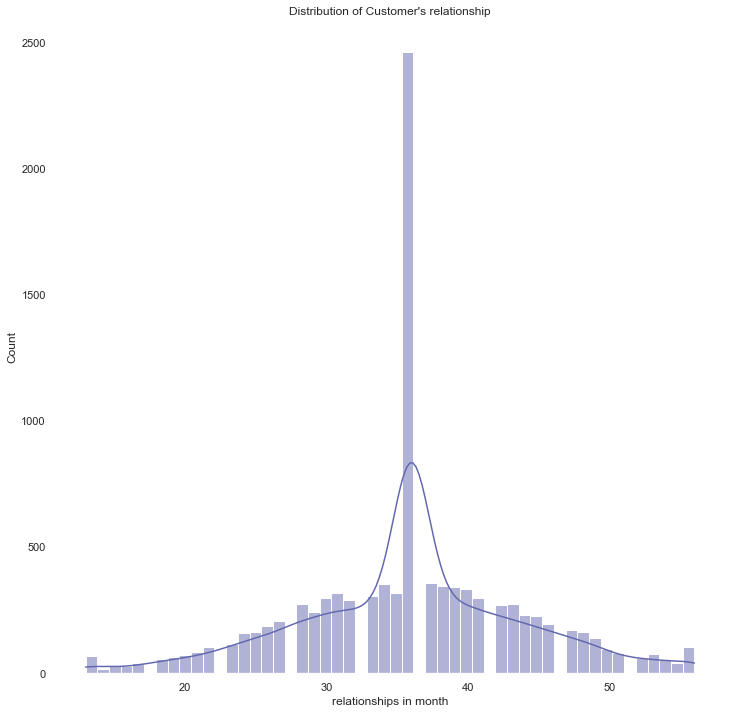

In [20]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.histplot(data,x='Months_on_book',kde=True, color = "#6368af");
plt.xlabel("relationships in month");
plt.title("Distribution of Customer's relationship");

From here, we can see that the density is between 35-40.

In [21]:
print(data["Months_on_book"].min())
print(data["Months_on_book"].max())

13
56


In [22]:
data["Months_on_book"].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

It is possible that the pick at 36 months for the '*Months_on_book*' feature is due to a specific policy or event that occurred within the bank. **36 months** is not an inherently significant number in banking, but it could be a duration that aligns with certain policies or promotions that the bank has implemented. For example, it could be that the bank has a promotion for customers who have been with them for at least 36 months, which would incentivize customers to stay with the bank for that duration. Without more information about the bank's policies and events, it's difficult to say for certain why there is a peak at 36 months.<br>

It is also possible that 36 months is a common duration for customers to stay with a bank, either due to the nature of the services they provide or the customer's own financial needs. It could also be due to certain policies or regulations that limit or encourage certain behaviors by the bank or its customers.

In [23]:
data.loc[(data['Months_on_book'] <= 25),'Months_on_book'] = 0
data.loc[(data['Months_on_book'] > 25) & (data['Months_on_book'] <= 35),'Months_on_book'] = 1
data.loc[(data['Months_on_book'] > 35) & (data['Months_on_book'] <= 45),'Months_on_book'] = 2
data.loc[(data['Months_on_book'] > 45) & (data['Months_on_book'] <= 60),'Months_on_book'] = 3
data['Months_on_book'] = data['Months_on_book'].astype(int)

In [24]:
data['Months_on_book'].value_counts()

2    5140
1    2790
3    1185
0    1012
Name: Months_on_book, dtype: int64

In [25]:
fig = px.histogram(data, x="Months_on_book",color_discrete_sequence=['#B8E8FC','#ECA869','#CEEDC7','#EAC7C7','#B08BBB'],
                   color = 'Attrition_Flag', title='Distribution of Customer\'s Relationship and Churn State',
                   labels={'Months_on_book':'relationship scale'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Relationship")
fig.show()

As can be seen here, the highest non-churn customer value is seen between 35-45 months. In terms of customer relationship, this corresponds to a relationship of *3-4 years*. The reason for this may be that customers who have a credit card membership between 35-45 months, as mentioned before, may terminate their membership after completing the required period in the membership agreement.

### Total_Relationship_Count

This feature represents the *total number of products held by the customer*.

In [26]:
data['Total_Relationship_Count'].value_counts()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

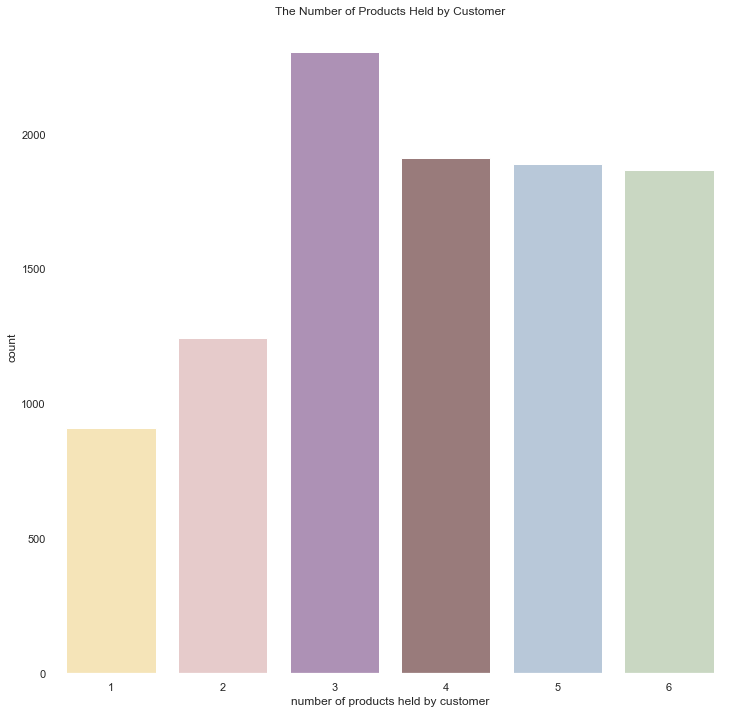

In [27]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.countplot(x=data["Total_Relationship_Count"], palette=['#FFE9AE','#EAC7C7','#B08BBB','#9E7676','#B2C8DF','#C8DBBE']);
plt.xlabel("number of products held by customer");
plt.title("The Number of Products Held by Customer");

### Contacts_Count_12_mon

This feature represents the number of times the client reached to bank one time and the same vice versa. This feature could be a useful feature to include in the analysis as it provides insight into the level of engagement and communication between the bank and its customers. <br>

With this feature couple of new features can be created such as:<br>
- A binary feature indicating whether a customer has had more than a certain number of contacts with the bank in the last 12 months
- A categorical feature indicating the range of contacts a customer has had with the bank (e.g. 0-5 contacts, 6-10 contacts, etc.)
- Comparing 'Contacts_Count_12_mon' with other features like 'Months_on_book' or 'Account_balance' to identify patterns or trends.
- Creating a new feature which is the ratio of 'Contacts_Count_12_mon' over 'Months_on_book' to get the average number of contacts per month.

In [28]:
data['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [29]:
data['Contacts_Count_12_mon'].describe()

count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64

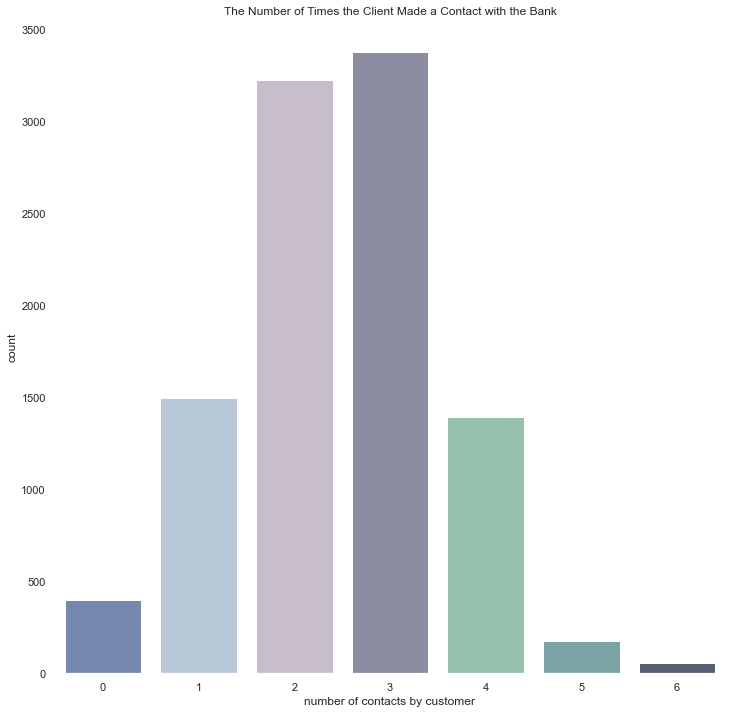

In [30]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.countplot(x=data["Contacts_Count_12_mon"], palette=['#6E85B7','#B2C8DF','#C9BBCF','#898AA6','#90C8AC','#73A9AD',
                                                       '#525E75']);
plt.xlabel("number of contacts by customer");
plt.title("The Number of Times the Client Made a Contact with the Bank");

### Credit_Limit

The customers credit limit on the credit card.

In [31]:
data["Credit_Limit"].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

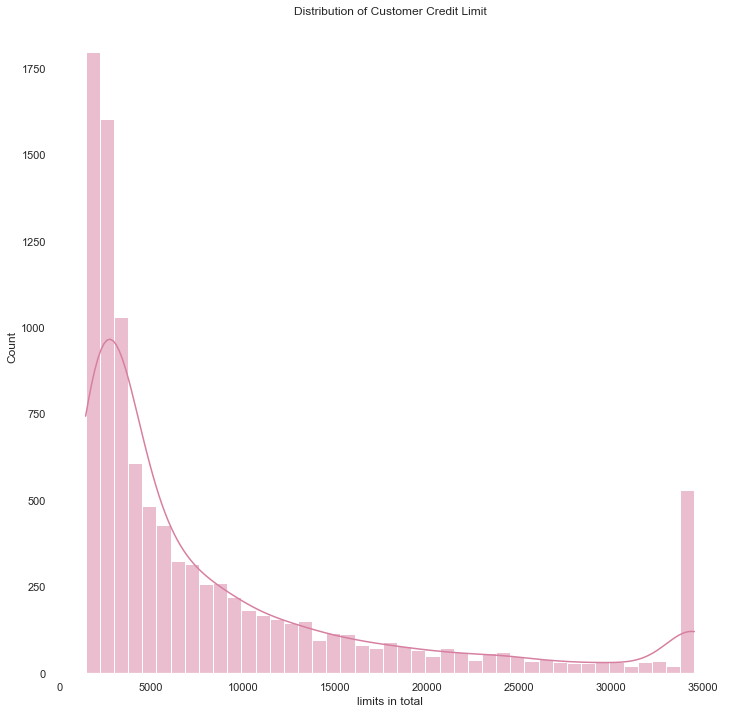

In [32]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.histplot(data,x='Credit_Limit',kde=True, color = "#D77FA1");
plt.xlabel("limits in total");
plt.title("Distribution of Customer Credit Limit");

As can be seen here, users with a credit card limit of approximately 35000 show a high value. When the patterns of these users are examined:

In [33]:
data.loc[(data["Credit_Limit"] > 34500)].head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,810347208,0,2,M,4,Unknown,Married,$120K +,Gold,3,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
45,712661433,0,2,M,4,Uneducated,Single,$80K - $120K,Blue,1,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
61,712030833,1,2,M,2,Graduate,Married,$60K - $80K,Silver,1,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
65,788979258,0,2,M,4,Uneducated,Single,$80K - $120K,Silver,2,4,1,4,34516.0,1515,33001.0,0.592,1293,32,0.600,0.044
70,715971108,0,2,M,4,Graduate,Single,$120K +,Blue,2,3,2,3,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051
81,715156383,0,1,M,1,Unknown,Unknown,$120K +,Blue,2,6,2,2,34516.0,1533,32983.0,0.924,1603,29,0.526,0.044
84,794543958,0,2,M,1,Graduate,Divorced,$80K - $120K,Blue,1,5,4,2,34516.0,1219,33297.0,1.129,1590,27,2.000,0.035
101,713843283,0,1,F,3,Unknown,Married,Unknown,Silver,1,5,3,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059
106,779509983,0,2,M,2,Post-Graduate,Single,$120K +,Blue,2,6,1,2,34516.0,931,33585.0,0.828,1022,21,1.100,0.027
120,718414008,0,2,M,2,Graduate,Single,$120K +,Blue,2,3,2,2,34516.0,1023,33493.0,1.004,1064,13,0.625,0.030


In [34]:
data.loc[(data["Credit_Limit"] > 34500)][["Months_on_book","Credit_Limit"]].head(10)

,Months_on_book,Credit_Limit
6,3,34516.0
45,1,34516.0
61,1,34516.0
65,2,34516.0
70,2,34516.0
81,2,34516.0
84,1,34516.0
101,1,34516.0
106,2,34516.0
120,2,34516.0


It is seen that all of the customers have a credit limit of 34516.0. In general, it is seen that the number of inactive months is low, and the income categories are 60K-80K, 80K-120K and $120K +.

This credit limit can be a special credit limit that the bank gives to its customers who meet certain criteria. At the same time, there may be a limit that it offers to its customers as a promotion.

In addition, when the customers with this limit are examined for how many months they have been customers of the bank, it is seen that the distribution is between 1-3 months. *This shows that customers are given a high limit credit card membership by applying a certain promotion*. An important **policy** of the bank may have been to build a high-income client base.

### Total_Revolving_Bal

This feature represents the total revolving balance on the credit card of the customer, it could be a useful feature in the analysis as it provides insight into the customer's credit utilization and spending habits. 

Create new features such as:
- a binary feature indicating whether a customer has a high or low revolving balance
- a ratio feature between 'Total_Revolving_Bal' and 'Credit_Limit' to get the credit utilization rate, which is a key factor in credit scoring.
- Comparing 'Total_Revolving_Bal' with other features like 'Income' or 'Months_on_book' to identify patterns or trends.

It is important to keep in mind that, this feature could be correlated with other features and could be impacted by external factors such as interest rates, economic conditions, etc. It would be useful to look at the bank's internal data and external factors that might have led to this feature and also keep in mind that, this feature alone cannot be used for any predictions or classifications because it is a continuous variable.

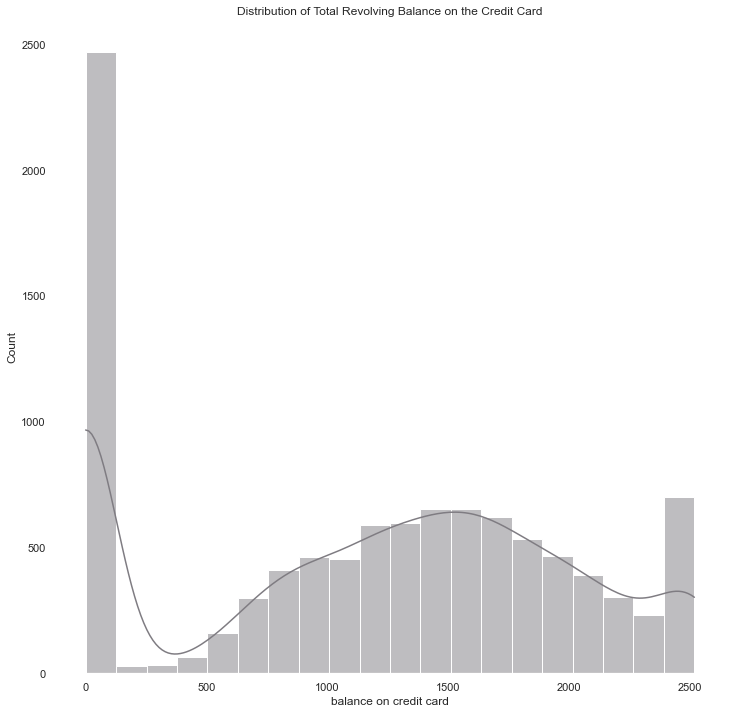

In [35]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.histplot(data,x='Total_Revolving_Bal',kde=True, color = "#7F7C82");
plt.xlabel("balance on credit card");
plt.title("Distribution of Total Revolving Balance on the Credit Card");

### Transaction Related Features

The "Total_Amt_Chng_Q4_Q1" feature which indicates the change in transaction amount (Q4 over Q1).<br>
The "Total_Trans_Amt" feature which represents total transaction amount (last 12 months).<br>
The "Total_Trans_Ct" feature which tells the total transaction count (Last 12 months). <br> 
The "Total_Ct_Chng_Q4_Q1" feature which represents the change in transaction count (Q4 over Q1). <br>

We have several features related to transaction activity and change in transaction activity that may be useful in predicting customer churn. Creating new features such as:
- a ratio of 'Total_Amt_Chng_Q4_Q1' and 'Total_Trans_Amt' to see the percentage change in transaction amount
- a ratio of 'Total_Ct_Chng_Q4_Q1' and 'Total_Trans_Ct' to see the percentage change in transaction count
- Comparing these features with other features like 'Months_on_book' or 'Account_balance' to identify patterns or trends.

It is also important to consider the time frame of these features, as the change in transaction amount and count over Q4 to Q1 may indicate a different trend than the total transaction amount and count over the last 12 months.

### Average Transaction Count per Contact

This feature could be useful because it gives an indication of how many transactions a customer typically makes per contact with the bank. This could be an indicator of how responsive a customer is to the bank's marketing efforts and how much they value their relationship with the bank.

In [36]:
data["Transaction_Count_per_Contact"] = data["Total_Trans_Ct"] / data["Months_on_book"]
data["Transaction_Count_per_Contact"].replace([np.inf, -np.inf], 0, inplace=True)

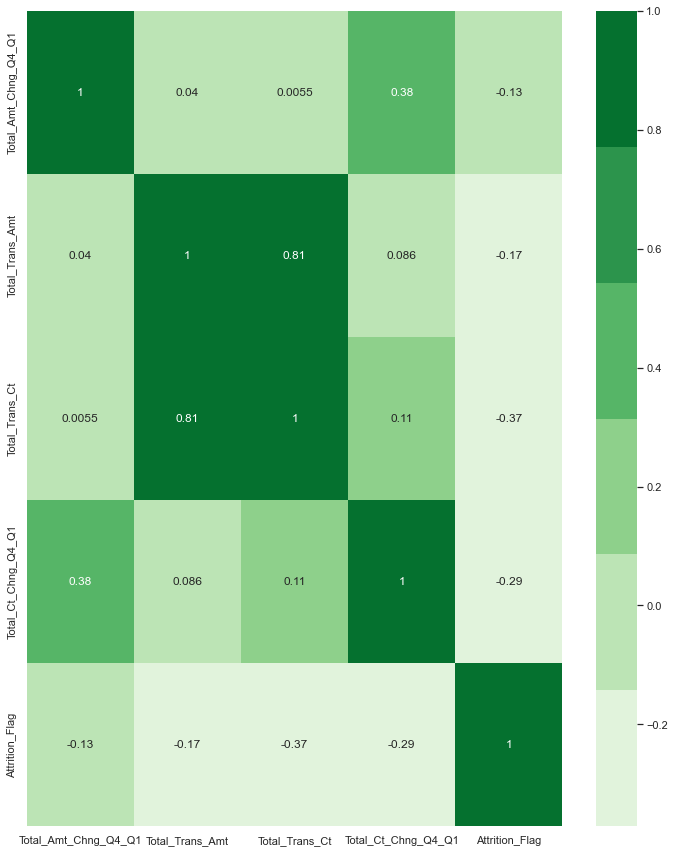

In [37]:
correlation = data[["Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
                    "Total_Ct_Chng_Q4_Q1","Attrition_Flag"]].corr()
colormap = sns.color_palette("Greens")
plt.figure(figsize=(12,15))
sns.heatmap(correlation, annot=True,cmap=colormap);

Total_Trans_Ct and Total_Trans_Amt are *highly* **correlated**.

----------------

## Categorical Data Analyze and Visualization

Categorical data, also known as nominal data, is a type of data that can be divided into categories. The categories can take on a finite number of distinct values, and the values do not have a natural order or ranking. The main difference between categorical and numerical data is that numerical data can be measured, while categorical data can only be categorized.

There are several ways to analyze categorical data, including:

Frequency tables: This method involves counting the number of observations for each category. It can be useful for understanding the distribution of the data and identifying any patterns or outliers.

Bar charts and pie charts: These are graphical representations of the data that can help visualize the distribution of the categories.

Cross-tabulation: This method involves comparing two or more categorical variables. It can be useful for identifying relationships between variables.

Chi-squared test: This is a statistical test that can be used to determine if there is a significant association between two categorical variables.

In [38]:
print(categorical_data)
data[categorical_data].head()

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


### Gender

In [39]:
#mean of age and sum of churn customer by gender
data.groupby("Gender").agg({"Customer_Age":"mean",
                      "Attrition_Flag":"sum",
                      })

,Customer_Age,Attrition_Flag
Gender,,
F,1.697462,930
M,1.671210,697


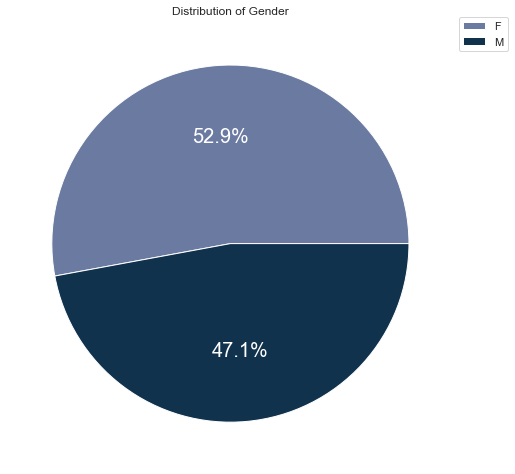

In [40]:
plt.figure(figsize=(8,10));
data.groupby('Gender').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 20,'color':"w"},
                                 colors=['#6B7AA1', '#11324D']);
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Distribution of Gender");
plt.ylabel("");

### Education_Level

This feature represents the educational qualification of the account holder.

In [41]:
fig = px.histogram(data, x="Education_Level",color_discrete_sequence=['#9E7777','#6F4C5B'],
                   color = "Attrition_Flag", title='Distribution of Customer\'s Education Level and Churn',
                   labels={'Education_Level':'education level'},
                  barmode='group')
fig.update_xaxes(type='category')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Churn State")
fig.show()

### Marital_Status


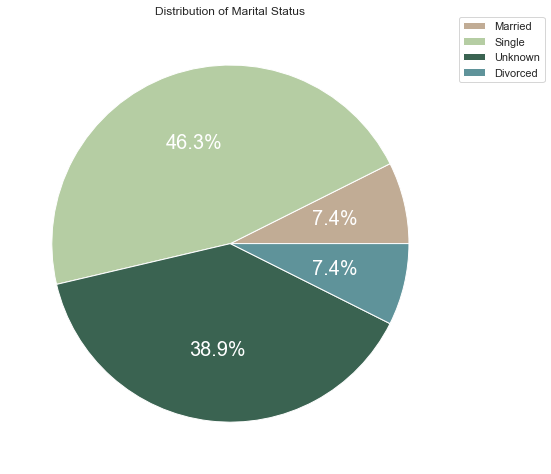

In [42]:
labels = list(data["Marital_Status"].unique());
plt.figure(figsize=(8,10));
data.groupby('Marital_Status').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 20,'color':"w"},
                                 labels=labels,colors=['#C1AC95', '#B5CDA3','#3A6351','#5F939A']);
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left');
plt.title("Distribution of Marital Status");
plt.ylabel("");

### Income_Category

This feature represents the annual income category of the account holder. The relationship between income level and other features in the data, such as credit limit or default rate should be investigated.

In [43]:
#mean of credit limit and sum of churn customer by income categories
data.groupby("Income_Category").agg({"Credit_Limit":"mean",
                                     "Attrition_Flag":"sum"})

,Credit_Limit,Attrition_Flag
Income_Category,,
$120K +,19717.322558,126
$40K - $60K,5462.259832,271
$60K - $80K,10758.772967,189
$80K - $120K,15809.890945,242
Less than $40K,3754.404521,612
Unknown,9516.582464,187


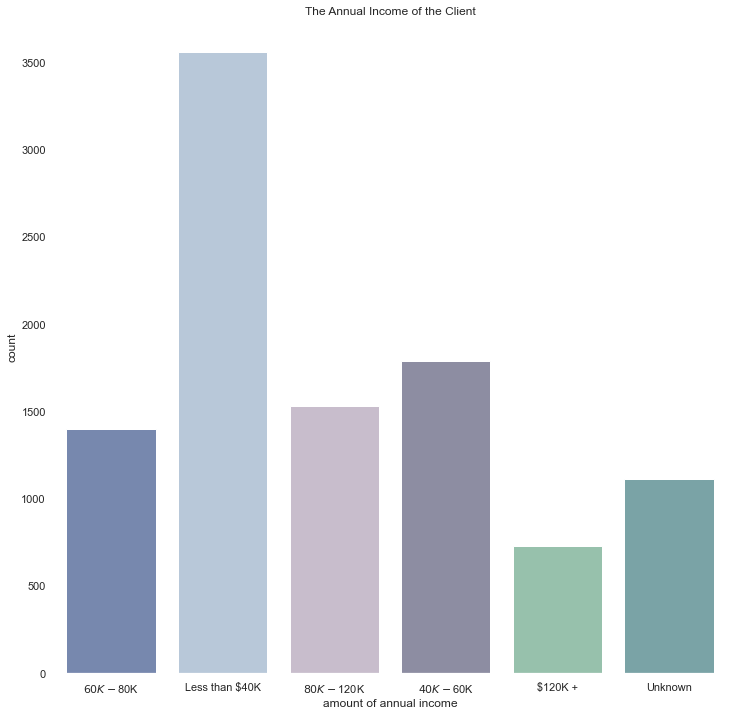

In [44]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.countplot(x=data["Income_Category"], palette=['#6E85B7','#B2C8DF','#C9BBCF','#898AA6','#90C8AC','#73A9AD',
                                                       '#525E75']);
plt.xlabel("amount of annual income");
plt.title("The Annual Income of the Client");

As can be seen from this chart, a large proportion of customers have an income of less than 40K. This rate is followed by the 40K-60K income group with approximately 2000 customers.

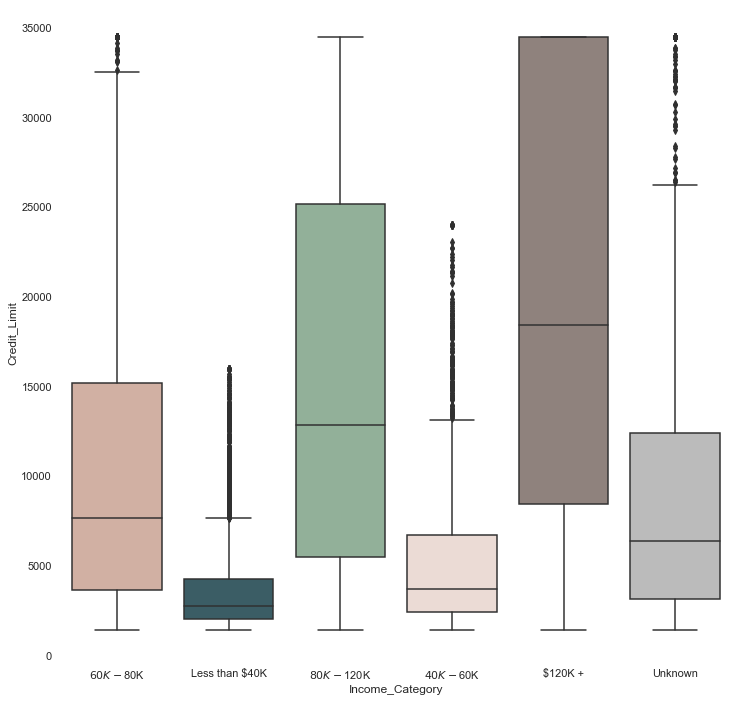

In [45]:
sns.boxplot(x=data["Income_Category"], y=data["Credit_Limit"],
            palette=['#D8AC9C','#34626C','#8DB596','#EFD9D1','#92817A','#BBBBBB','#F7DAD9']);

As can be seen from this analysis, the customer with the highest credit limit is in the 80K-120K and 120K+ income groups. While the general limit average of the 120K income group is close to 20000, the limit average of the 80K-120K income group is close to 15000. There are especially 60K-80 and unknown income group customers with high limits, but the average limit for both groups is around 10000. Although the average credit score of the lowest income group is low as expected, some customers seem to have a limit of up to 17000.

### Card_Category

In the context of credit cards, "Blue," "Silver," "Gold," and "Platinum" are typically used to indicate the level of benefits and rewards offered by the card.

- A Blue card is often a basic card with standard features and limited rewards.
- A Silver card may offer slightly more benefits and rewards than a Blue card.
- A Gold card typically offers a higher level of benefits and rewards, such as cashback or travel rewards.
- A Platinum card is usually the highest level of card offered, with the most extensive benefits and rewards, such as concierge service and exclusive access to events.

The specific benefits and rewards associated with each card level can vary depending on the bank and the card issuer. Some banks also offer different levels of cards such as Signature, World, Elite etc. But generally, these four levels of cards are the most common.

In [46]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

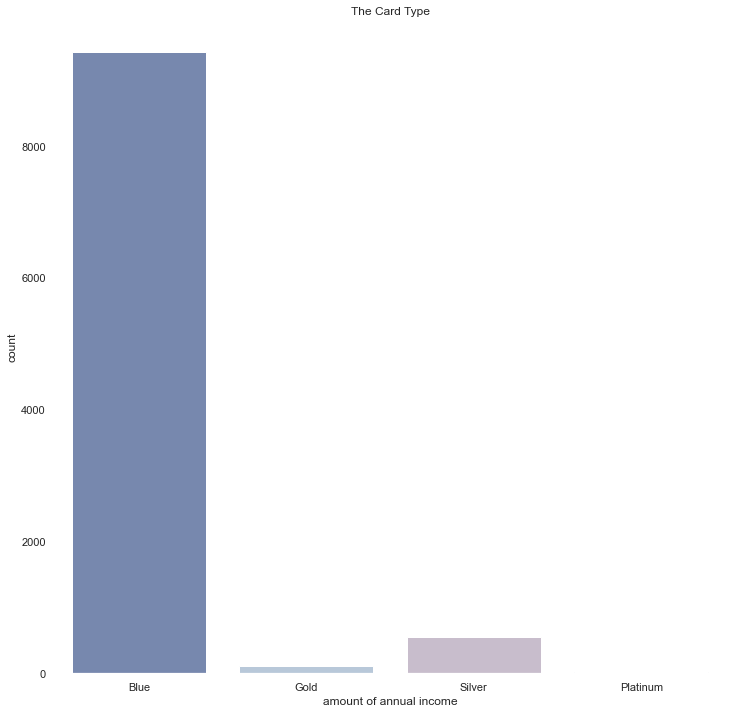

In [47]:
sns.countplot(x=data["Card_Category"], palette=['#6E85B7','#B2C8DF','#C9BBCF','#898AA6','#90C8AC','#73A9AD',
                                                       '#525E75']);
plt.xlabel("amount of annual income");
plt.title("The Card Type");

In [48]:
#platinum = data[data["Card_Category"] == 'Platinum']
fig = px.histogram(data, x="Card_Category",color_discrete_sequence=['#7F669D','#B2D3BE','#F2F4D1','#5E6073',
                                                                   '#FFD495','#AD8E70'],
                   color = "Income_Category", title='Distribution of Customer\'s Education Level and Churn',
                   labels={'Education_Level':'education level'},
                  barmode='group')
fig.update_xaxes(type='category');
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",legend_title="Customer\'s Churn State");
fig.show();

### Correlation Between Dependent And Independent Dependent Features

Correlation is a statistical measure that describes the relationship between two or more variables. In data analysis, it is important to check and visualize the correlation between different features because it can provide insight into which features are related to each other and may be predictive of the target variable.

There are a few reasons why visualizing and checking correlation is important in data analysis:

- *Identification of redundant features*: Correlated features can contain redundant information, and in some cases, it's better to remove one of them to improve the model's performance.

- *Model interpretability*: A high correlation between a feature and the target variable can indicate that the feature is important for predicting the target variable.

- *Multi-collinearity*: Correlated features can cause a problem called multi-collinearity in linear regression models, which can lead to unstable and unreliable estimates of model coefficients.

- *Identifying the relationships between the features*: Correlation helps to identify the relationships between the features, which can be useful for feature selection and feature engineering.

- *Identifying the outlier*: Correlation also helps to identify the outlier values in the dataset, which can be further examined.

There are different ways to check and visualize correlation, such as using correlation matrices, heatmaps, scatter plots, etc. It's important to be aware of the correlation between the features before building a model, so that the data scientist can make an informed decision on which features to include and which ones to exclude in the model.

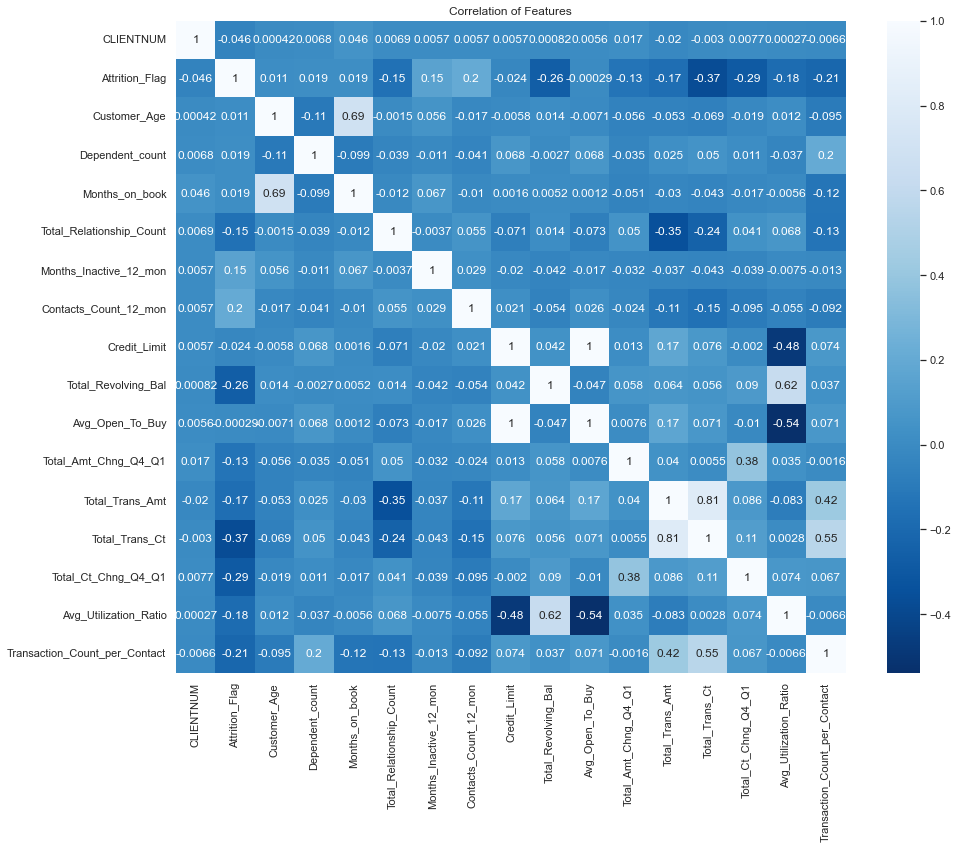

In [49]:
correlation = data.corr()
plt.figure(figsize=(15,12));
sns.heatmap(correlation,annot=True, cmap="Blues_r");
plt.title("Correlation of Features");

As can be seen here *Avg_Open_To_Buy* and *Credit_Limit* are **highly correlated**. <br>
Also *Total_Trans_Ct* and *Total_Trans_Ct* have high correlation. <br>
Between *Months_on_book* and *Customer_Age* attributes that also have a correlation relationship. <br>
Additionally, *Avg_Utilization_Ratio* and *Avg_Open_To_Buy* have **negative correlation**.<br>

In [50]:
corr_matrix = data.corr()
print(corr_matrix["Attrition_Flag"].sort_values(ascending=False))

Attrition_Flag                   1.000000
Contacts_Count_12_mon            0.204491
Months_Inactive_12_mon           0.152449
Dependent_count                  0.018991
Months_on_book                   0.018824
Customer_Age                     0.011180
Avg_Open_To_Buy                 -0.000285
Credit_Limit                    -0.023873
CLIENTNUM                       -0.046430
Total_Amt_Chng_Q4_Q1            -0.131063
Total_Relationship_Count        -0.150005
Total_Trans_Amt                 -0.168598
Avg_Utilization_Ratio           -0.178410
Transaction_Count_per_Contact   -0.212997
Total_Revolving_Bal             -0.263053
Total_Ct_Chng_Q4_Q1             -0.290054
Total_Trans_Ct                  -0.371403
Name: Attrition_Flag, dtype: float64


There is no strongly correlated features with *Attrition_Flag*(**Churn**) feature. However, the absence of correlation doesn't mean that the features can't be used to predict the target variable. There are other techniques that can be used to analyze the data and build models, such as decision trees, random forests, and gradient boosting. These models are less sensitive to the correlation between the features and can still provide accurate predictions.

# Feature Engineering

Feature engineering is the process of transforming raw data into features that can be used to train a machine learning model. It is the process of creating new features from the existing ones, which can help to improve the performance of the model.

- Data cleaning: This includes removing missing values, handling outliers, and dealing with inconsistent data.

- Feature transformation: This includes normalizing and scaling the features, and applying mathematical transformations to the features.

- Feature creation: This includes creating new features from existing ones, such as calculating the ratio of two features or creating a polynomial feature.

- Feature selection: This includes selecting the most important features to use in the model.

- Encoding categorical variables: This includes converting categorical variables into a format that can be used by the model, such as one-hot encoding or target encoding.

- Correlation analysis: This includes checking and visualizing the correlation between the features and the target variable.

- Grouping: We can group the categories into broader groups, for example, we can group Blue, Silver, Gold, and Platinum into Premium, Standard, and Basic categories. This can reduce the dimensionality of the data and make it easier to work with.

- Extracting information: We can extract information from the features by looking at the distribution of values within the data, and how the features relate to other features in the data, such as customer demographics, purchase behavior, and credit history.

It's important to note that feature engineering is an iterative process, and may need to try different techniques to find the best features for the model. Also, it is important to keep in mind that feature engineering is highly dependent on the problem and the data at hand.

### Converting Categorical Features

There are several ways to convert categorical data to numerical data for a machine learning model. One common method is to use one-hot encoding, which creates a new binary column for each unique category in the data. Another method is to use label encoding, which assigns a unique integer value to each category. Another approach is to use embeddings which are continuous and dense representation of categorical variable, this can be useful in deep learning model.

In [51]:
# Gender
data.loc[(data['Gender'] == "M"),'Gender'] = 0
data.loc[(data['Gender'] == "F"),'Gender'] = 1

In [52]:
# Education
ed_cats={'Uneducated':0, 'High School':0, 'Graduate':1, 'College':1, 'Post-Graduate':1,
       'Unknown': np.nan, 'Doctorate': 2}

data['Education_Level'] = data['Education_Level'].apply(lambda x: ed_cats[x])
data['Education_Level'] = data['Education_Level'].fillna(data.Education_Level.median())

data['Education_Level'] = data['Education_Level'].astype(int)

In [53]:
# Marital_Status
marital_cats={'Single':0, 'Married':1, 'Divorced':2, 'Unknown': np.nan}

data['Marital_Status'] = data['Marital_Status'].apply(lambda x: marital_cats[x])
data['Marital_Status'] = data['Marital_Status'].fillna(data.Marital_Status.median())

data['Marital_Status'] = data['Marital_Status'].astype(int)

In [54]:
# Income_Category
income_cats={'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':4, '$60K - $80K':3,
       'Unknown': np.nan, '$120K +': 5}

data['Income_Category'] = data['Income_Category'].apply(lambda x: income_cats[x])
data['Income_Category'] = data['Income_Category'].fillna(data.Income_Category.median())

data['Income_Category'] = data['Income_Category'].astype(int)

In [55]:
# Card_Category_Category
card_cats={'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}

data['Card_Category'] = data['Card_Category'].apply(lambda x: card_cats[x])
data['Card_Category'] = data['Card_Category'].astype(int)

In [56]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact
0,768805383,0,2,0,3,0,1,3,0,2,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,21.0
1,818770008,0,2,1,5,1,0,1,0,2,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,16.5
2,713982108,0,2,0,3,1,1,4,0,2,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,10.0
3,769911858,0,1,1,4,0,1,1,0,1,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,20.0
4,709106358,0,1,0,3,0,1,3,0,0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


### New Features

1. Establish a relationship between the **Months_on_book** and **Months_Inactive_12_mon** attributes and create a new column named *loyal customer*. Because a loyal customer will be less likely to churn.

In [57]:
# Loyal Customer
data["Loyal_Customer"] = 0
data.loc[(data["Months_on_book"] > 1) & (data["Months_Inactive_12_mon"] < 4),"Loyal_Customer"] = 1

# Ratio
print(len(data[data["Loyal_Customer"] == 1]))
print(len(data[data["Loyal_Customer"] == 0]))
print("Loyal Customer Percentage : ", (len(data[data["Loyal_Customer"] == 1]) / len(data)))

5784
4343
Loyal Customer Percentage :  0.5711464402093414


### Creditworthiness

This feature could be useful because it gives an indication of how much credit a customer has relative to their income. This could be an indicator of creditworthiness and the risk of default.

The threshold for the **creditworthiness** can vary depending on the bank's policies and the specific credit product. In general, a lower ratio indicates that a customer has a higher income relative to their credit limit, which is considered a positive indicator of creditworthiness. Conversely, a higher ratio indicates that a customer has a lower income relative to their credit limit, which is considered a negative indicator of creditworthiness.

Banks typically use a variety of factors to assess a customer's creditworthiness, including their income, credit score, credit history, and debt-to-income ratio. The exact threshold for each of these factors can also vary depending on the bank's policies and the specific credit product. For example, for a mortgage loan, banks generally look for a debt-to-income ratio below 43%, while for a credit card, the threshold may be higher.

However, it's important to keep in mind that the ratio alone may not be enough to determine creditworthiness. Banks generally use a variety of factors, such as credit score, credit history, and debt-to-income ratio, to make lending decisions.

Therefore we will create another feature to calculate **credit utilization rate** by making a ratio between *Total_Revolving_Bal* and *Credit_Limit*.

In [58]:
approx_income = {1: 20000, 2: 50000, 4: 100000, 3:70000, 5: 130000}

data['Approx_Income'] = data['Income_Category'].apply(lambda x: approx_income[x])

For example, for the group "40K", we can assign the value 40,000. For the group "60K-80K", we can assign the value 70,000 (midpoint of the range). And for the group "80K-120K" we can assign the value 100,000. Keep in mind that this is just an example, and the values we choose will depend on the data and what makes sense for the analysis.

Once we've assigned numerical values to the income groups, we can calculate the **Creditworthiness** feature by dividing the numerical income value by the **Credit_Limit** value.

In [59]:
data['Creditworthiness'] = data['Approx_Income'] / data['Credit_Limit']
data = data.drop('Approx_Income', axis="columns")

In [60]:
data['Creditworthiness'].value_counts()

13.905305    315
2.897207     215
3.766369     203
34.763262    136
2.028045      49
            ... 
3.715400       1
2.523978       1
10.889687      1
11.070519      1
1.925298       1
Name: Creditworthiness, Length: 7255, dtype: int64

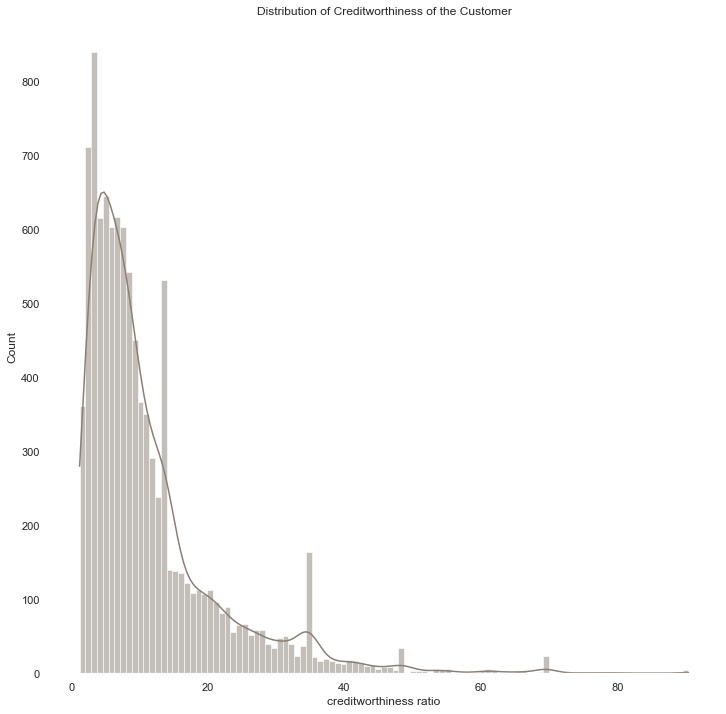

In [61]:
sns.histplot(data,x='Creditworthiness',kde=True, color = "#8B7E74");
plt.xlabel("creditworthiness ratio");
plt.title("Distribution of Creditworthiness of the Customer");

In general, there is customer data with low income and high credit limit. Most of them have the same number of credit card (bank) participation months, that is, to attract customers with a promotion.

In [62]:
# credit utilization rate
data["Cr_Util_Rate"] = data['Total_Revolving_Bal'] / data['Credit_Limit']

Credit utilization rate is the ratio of a borrower's outstanding credit card balances to their credit limits. Banks use this ratio to determine a borrower's creditworthiness. A lower credit utilization rate indicates that a borrower is using less of their available credit and is considered more financially responsible, while a higher credit utilization rate may indicate that the borrower is overextending themselves and may be at a higher risk of default. A general rule of thumb is to keep the credit utilization rate **below 30%**.

It's also worth noting that credit utilization rate is one of the factors that can affect the credit score, a lower credit utilization rate is better for credit score.

In [63]:
data["Cr_Util_Rate"].describe()

count    10127.000000
mean         0.274892
std          0.275689
min          0.000000
25%          0.022714
50%          0.175650
75%          0.502691
max          0.998768
Name: Cr_Util_Rate, dtype: float64

The mean value of 0.27 suggests that on average, the customers are utilizing about 27% of their credit limit. This is generally considered to be a relatively low utilization rate, which is good for credit scores and implies that customers are managing their credit well.

The standard deviation of 0.28 suggests that there is a relatively high degree of variation in credit utilization rates among the customers. The minimum value of 0.0 suggests that some customers are not utilizing any of their credit limit, while the maximum value of 0.99 suggests that some customers are utilizing almost all of their credit limit.

To analyze this feature to predict customer churn, one way is to create a binary variable indicating whether or not each customer's credit utilization rate is above or below a certain threshold. For example,could create a new variable that is 1 if the customer's utilization rate is above 30%, and 0 if it is below 30%. Then could use this variable as a feature in the machine learning model to predict churn.

In [64]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate
0,768805383,0,2,0,3,0,1,3,0,2,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,21.0,1,5.515720,0.061224
1,818770008,0,2,1,5,1,0,1,0,2,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,16.5,1,2.422481,0.104651
2,713982108,0,2,0,3,1,1,4,0,2,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,10.0,1,29.256875,0.000000
3,769911858,0,1,1,4,0,1,1,0,1,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,20.0,0,6.036825,0.759734
4,709106358,0,1,0,3,0,1,3,0,0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,0,14.843087,0.000000


## Scaling the Data

Since we didn't remove outliers (because it was in small amount) we will apply *Robust scaling*, also known as robust normalization, is a method of transforming data so that it is more robust to outliers. Unlike other scaling methods, such as standardization, which is sensitive to outliers, robust scaling methods are designed to reduce the influence of outliers on the scaling process.

One popular robust scaling method is the **Median-Absolute-Deviation** (MAD) method. This method scales the data by subtracting the median and then dividing by the MAD (the median of the absolute deviations from the median). Because the median and MAD are not affected by outliers, this method is more robust to outliers than other methods, such as standardization.

Another robust scaling method is the quantile normalization, where the data is transformed such that the distribution of each feature will have the same distribution, this will make the data robust to outliers by reducing the effect of extreme values.

In [65]:
robust_scaler = RobustScaler()
robust_scaler.fit_transform(data.drop('Attrition_Flag',axis=1))
scaled_features = robust_scaler.transform(data.drop('Attrition_Flag',axis=1))
copy_data = data.drop(data.columns[1], axis=1)
scaled_features = pd.DataFrame(scaled_features, columns = copy_data.columns)

scaled_features.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate
0,0.846478,0.0,-1.0,0.5,-1.0,0.0,0.5,0.0,0.0,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583,-0.500000,0.0,-0.284692,-0.238398
1,1.677742,0.0,0.0,1.5,0.0,-1.0,-0.5,0.0,0.0,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917,-0.666667,0.0,-0.618989,-0.147921
2,-0.065621,0.0,-1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667,-0.907407,0.0,2.281101,-0.365955
3,0.864886,-1.0,0.0,1.0,-1.0,0.0,-0.5,0.0,-1.0,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667,-0.537037,-1.0,-0.228374,1.216900
4,-0.146739,-1.0,-1.0,0.5,-1.0,0.0,0.5,0.0,-2.0,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667,-1.277778,-1.0,0.723351,-0.365955


In [66]:
scaled_features["Attrition_Flag"] = data["Attrition_Flag"]
scaled_features.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate,Attrition_Flag
0,0.846478,0.0,-1.0,0.5,-1.0,0.0,0.5,0.0,0.0,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583,-0.500000,0.0,-0.284692,-0.238398,0
1,1.677742,0.0,0.0,1.5,0.0,-1.0,-0.5,0.0,0.0,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917,-0.666667,0.0,-0.618989,-0.147921,0
2,-0.065621,0.0,-1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667,-0.907407,0.0,2.281101,-0.365955,0
3,0.864886,-1.0,0.0,1.0,-1.0,0.0,-0.5,0.0,-1.0,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667,-0.537037,-1.0,-0.228374,1.216900,0
4,-0.146739,-1.0,-1.0,0.5,-1.0,0.0,0.5,0.0,-2.0,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667,-1.277778,-1.0,0.723351,-0.365955,0


In [67]:
def save_data(data):
    data.to_csv("customer_data.csv", index=False)